Ridge MSE: 3.30
Bayesian Ridge MSE: 3.30


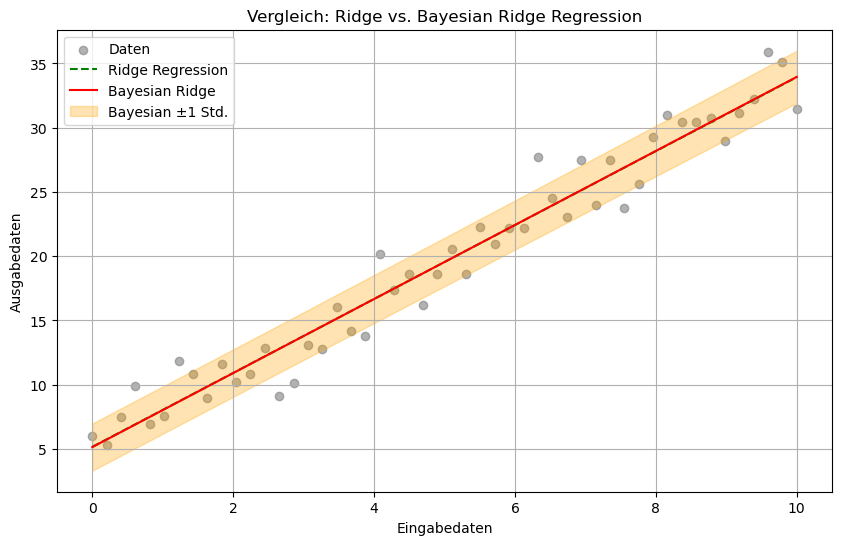

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.metrics import mean_squared_error

# Daten generieren (lineare Beziehung mit Rauschen)
np.random.seed(42)
input_data = np.linspace(0, 10, 50).reshape(-1, 1)
output_data = 3.0 * input_data.ravel() + 5 + np.random.normal(0, 2, input_data.shape[0])  # y = 3x + 5 + noise

# Modelle initialisieren
ridge = Ridge(alpha=1.0)
bayes_ridge = BayesianRidge()

# Trainieren
ridge.fit(input_data, output_data)
bayes_ridge.fit(input_data, output_data)

# Vorhersagebereich
input_data_test = np.linspace(0, 10, 200).reshape(-1, 1)
output_data_ridge_pred = ridge.predict(input_data_test)
output_data_bayes_pred, output_data_bayes_std = bayes_ridge.predict(input_data_test, return_std=True)

# Fehler ausgeben
print(f"Ridge MSE: {mean_squared_error(output_data, ridge.predict(input_data)):.2f}")
print(f"Bayesian Ridge MSE: {mean_squared_error(output_data, bayes_ridge.predict(input_data)):.2f}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(input_data, output_data, color='gray', label='Daten', alpha=0.6)
plt.plot(input_data_test, output_data_ridge_pred, 'g--', label='Ridge Regression')
plt.plot(input_data_test, output_data_bayes_pred, 'r-', label='Bayesian Ridge')
plt.fill_between(input_data_test.ravel(),
                 output_data_bayes_pred - output_data_bayes_std,
                 output_data_bayes_pred + output_data_bayes_std,
                 color='orange', alpha=0.3, label='Bayesian ±1 Std.')
plt.xlabel("Eingabedaten")
plt.ylabel("Ausgabedaten")
plt.title("Vergleich: Ridge vs. Bayesian Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()